In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

column_names = ['month_of_salary', 'expenses_of_the_month', 'salary', 'accommodation', 'transportation', 'foods', 'BD_expenses', 'others', 'total_cost', 'remaining']
df = pd.read_csv("expenses.csv", names=column_names, header=0)
df = df.dropna(subset=['month_of_salary', 'expenses_of_the_month'])
df = df.reset_index(drop=True)
df.head(10)

,month_of_salary,expenses_of_the_month,salary,accommodation,transportation,foods,BD_expenses,others,total_cost,remaining
0,Auguest,September,"dh2,750.00",dh500.00,dh180.00,dh190.00,"dh1,380.00",dh225.00,"dh2,475.00",dh0.00
1,September,Octobaer,"dh2,500.00",dh505.00,dh170.00,dh200.00,"dh1,350.00",dh190.00,"dh2,415.00",dh70
2,Octobaer,November,"dh2,500.00",dh505.00,dh140.00,dh180.00,"dh1,400.00",dh200.00,"dh2,425.00",dh0.00
3,November,December,"dh2,500.00",dh505.00,dh145.00,dh180.00,"dh1,100.00",dh500.00,"dh2,430.00",NaN
4,December,Januray,"dh2,750.00",dh505.00,dh140.00,dh200.00,"dh1,650.00",dh250.00,"dh2,745.00",NaN


CONVERT TO FLOAT

In [47]:
column_clean = ["salary", "accommodation", "transportation", "foods", "BD_expenses", "others", "total_cost", "remaining"]

for column in column_clean:
    df[column] = df[column].astype(str)
    df[column] = df[column].str.replace("dh", "", regex=False)
    df[column] = df[column].str.replace(",", "", regex=True)
    df[column] = df[column].replace("", pd.NA)
    df[column] = pd.to_numeric(df[column], errors='coerce')

df = df.fillna(0)
print(df.head(10))

  month_of_salary expenses_of_the_month  salary  accommodation  \
0         Auguest             September  2750.0          500.0   
1       September              Octobaer  2500.0          505.0   
2        Octobaer              November  2500.0          505.0   
3        November              December  2500.0          505.0   
4        December               Januray  2750.0          505.0   

   transportation  foods  BD_expenses  others  total_cost  remaining  
0           180.0  190.0       1380.0   225.0      2475.0        0.0  
1           170.0  200.0       1350.0   190.0      2415.0       70.0  
2           140.0  180.0       1400.0   200.0      2425.0        0.0  
3           145.0  180.0       1100.0   500.0      2430.0        0.0  
4           140.0  200.0       1650.0   250.0      2745.0        0.0  


TOTAL EXPENSES


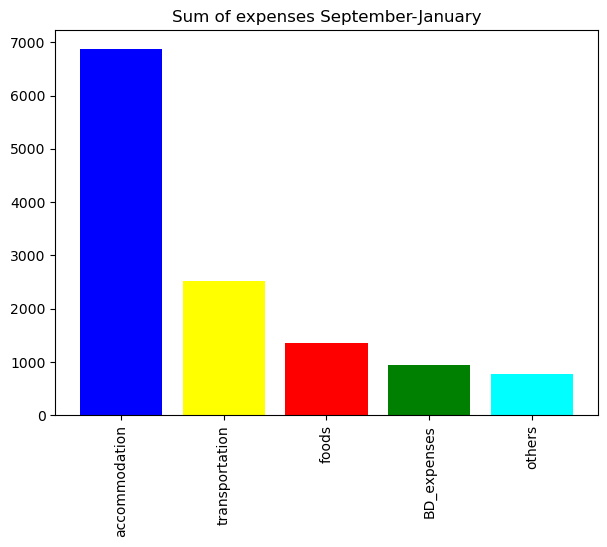

In [49]:
sum_expenses = {
    "accommodation" : df["accommodation"].sum(),
    "transportation" : df["transportation"].sum(),
    "foods" : df["foods"].sum(),
    "BD_expenses" : df["BD_expenses"].sum(),
    "others" : df["others"].sum(),
}

plt.figure(figsize = (7,5))
colors = ["blue", "yellow", "red", "green", "cyan"]
plt.bar(sum_expenses.keys(), sorted(sum_expenses.values(), reverse=True), color = colors)
plt.title("Sum of expenses September-January")
plt.xticks(rotation = 90)
plt.show()

MONTH OF EXPENSES


In [50]:
df = df[df["expenses_of_the_month"] != 0.0]
month_of_expenses =  df.groupby("expenses_of_the_month")["total_cost"].sum()
total_cost = df["total_cost"].sum()
month_of_expenses

expenses_of_the_month
December     2430.0
Januray      2745.0
November     2425.0
Octobaer     2415.0
September    2475.0
Name: total_cost, dtype: float64

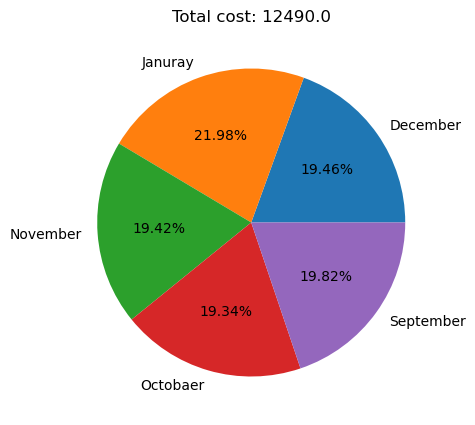

In [51]:
plt.figure(figsize = (5,5))
plt.title(f"Total cost: {total_cost}")
plt.pie(month_of_expenses, autopct="%.2f%%", labels=month_of_expenses.index)
plt.show()